# Introduction to Pandas

Pandas is a data analysis tool in Python. https://pandas.pydata.org/ If you are interested in Data Science, Data Analysis etc. in python you will need to know about pandas.

I came across it at a pycon talk a few years back, and it’s my go-to tool for processing data now. For example I use pandas for processing apache download stats and bug statistics. In a way, anything with lines of data you might consider doing in Excel, could probably be done in pandas. Most operations that are time consuming to perform such as selecting particular rows, applying functions to the data, and plotting it can be donw with a few lines of python and pandas.

I’m still a novice at this and regularly end up going to the docs and stackoverflow to figure out things, but hopefully I’ll be able to give you an idea of what’s possible here, and how easy it is to do.

# To set up the environment:
$ pip install matplotlib pandas numpy

In [2]:
import pandas as pd

# Some settings to make things easier to display
%pylab inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
figsize(20, 10)


Populating the interactive namespace from numpy and matplotlib


# Importing some data
I'm going to read in a CSV file from the Governments open data portal. I wanted to pick something that you won't find in other online tutorials and I'm pretty sure the NCT results for 2016 won't be covered in a tutorial elsehere :)
https://data.gov.ie/dataset/2016-make-model-year-failures-at-nct

You can manually create the dataframe but no one does that in practice. 

Typically you will be reading in a csv file with read_csv() or taking data from a database with read_sql().

In [79]:
data = [['jan', 31], 
        ['feb', 28], 
        ['mar', 31]] 
df = pd.DataFrame(data, columns = ['month', 'days'])
df

,month,days
0,jan,31
1,feb,28
2,mar,31


In [80]:
df = pd.read_csv("Make Model Data 2016.csv.orig", encoding='utf-8')

This fails as pandas can't decode some character in the file. Since the characters are in the initial rows explaining the data the simplest fix is to just remove the blurb in the csv file and reload.

In [6]:
# convention is to use df for DataFrame
df = pd.read_csv("Make Model Data 2016.csv", encoding='utf-8')
df.head()


,VehicleMake,VehicleModel,YearOfBirth,Total,PASS,PASS %,FAIL,FAIL %,Vehicle and Safety Equipment,Vehicle and Safety Equipment %,Lighting and Electrical,Lighting and Electrical %,Steering and Suspension,Steering and Suspension %,Braking Equipment,Braking Equipment %,Wheels and Tyres,Wheels and Tyres %,"Engine, Noise and Exhaust","Engine, Noise and Exhaust %",Chassis and Body,Chassis and Body %,Side Slip Test,Side Slip Test %,Suspension Test,Suspension Test %,Light test,Light test %,Brake Test,Brake Test %,Emmissions,Emmissions %,OTHER,OTHER %,Incompletable,Incompletable %
0,ALFA ROMEO,145,1996,1,1,100.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,ALFA ROMEO,145,1997,1,1,100.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,ALFA ROMEO,145,1998,4,2,50.0,2,50.0,1,25.0,2,50.0,2,50.0,1,25.0,0,0.0,0,0.0,1,25.0,2,50.0,0,0.0,0,0.0,1,25.0,0,0.0,0,0.0,0,0.0
3,ALFA ROMEO,145,1999,3,0,0.0,3,100.0,0,0.0,0,0.0,0,0.0,0,0.0,1,33.3,0,0.0,2,66.7,0,0.0,0,0.0,0,0.0,0,0.0,2,66.7,0,0.0,0,0.0
4,ALFA ROMEO,145,2000,2,1,50.0,1,50.0,0,0.0,1,50.0,1,50.0,1,50.0,1,50.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,50.0,0,0.0,0,0.0,0,0.0


# Information about the DataFrame

In [82]:
# Pandas when it's importing will make a guess at the datatypes
display(df.dtypes)
type(df.VehicleMake[0])


VehicleMake                        object
VehicleModel                       object
YearOfBirth                         int64
Total                               int64
PASS                                int64
PASS %                            float64
FAIL                                int64
FAIL %                            float64
Vehicle and Safety Equipment        int64
Vehicle and Safety Equipment %    float64
Lighting and Electrical             int64
Lighting and Electrical %         float64
Steering and Suspension             int64
Steering and Suspension %         float64
Braking Equipment                   int64
Braking Equipment %               float64
Wheels and Tyres                    int64
Wheels and Tyres %                float64
Engine, Noise and Exhaust           int64
Engine, Noise and Exhaust %       float64
Chassis and Body                    int64
Chassis and Body %                float64
Side Slip Test                      int64
Side Slip Test %                  

str

In [83]:
#Number of elements
df.size

293940

In [84]:
# Shape (cilumns, rows)
df.shape

(8165, 36)

In [85]:
#Number of dimensions
df.ndim

2

# Selecting and Slicing Data

In [7]:
# loc and iloc - getting rows by their index
# iloc - retuns what's in position 1
# loc - retursns what at index number 1

display(df.head())

display(df.loc[1])
display(df.iloc[1])

# Now reorder the data. loc stays the same but iloc changes
df  = df.sort_values('Total')
display(df.loc[1])
display(df.iloc[1])

,VehicleMake,VehicleModel,YearOfBirth,Total,PASS,PASS %,FAIL,FAIL %,Vehicle and Safety Equipment,Vehicle and Safety Equipment %,Lighting and Electrical,Lighting and Electrical %,Steering and Suspension,Steering and Suspension %,Braking Equipment,Braking Equipment %,Wheels and Tyres,Wheels and Tyres %,"Engine, Noise and Exhaust","Engine, Noise and Exhaust %",Chassis and Body,Chassis and Body %,Side Slip Test,Side Slip Test %,Suspension Test,Suspension Test %,Light test,Light test %,Brake Test,Brake Test %,Emmissions,Emmissions %,OTHER,OTHER %,Incompletable,Incompletable %
0,ALFA ROMEO,145,1996,1,1,100.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,ALFA ROMEO,145,1997,1,1,100.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,ALFA ROMEO,145,1998,4,2,50.0,2,50.0,1,25.0,2,50.0,2,50.0,1,25.0,0,0.0,0,0.0,1,25.0,2,50.0,0,0.0,0,0.0,1,25.0,0,0.0,0,0.0,0,0.0
3,ALFA ROMEO,145,1999,3,0,0.0,3,100.0,0,0.0,0,0.0,0,0.0,0,0.0,1,33.3,0,0.0,2,66.7,0,0.0,0,0.0,0,0.0,0,0.0,2,66.7,0,0.0,0,0.0
4,ALFA ROMEO,145,2000,2,1,50.0,1,50.0,0,0.0,1,50.0,1,50.0,1,50.0,1,50.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,50.0,0,0.0,0,0.0,0,0.0


VehicleMake                       ALFA ROMEO
VehicleModel                             145
YearOfBirth                             1997
Total                                      1
PASS                                       1
PASS %                                   100
FAIL                                       0
FAIL %                                     0
Vehicle and Safety Equipment               0
Vehicle and Safety Equipment %             0
Lighting and Electrical                    0
Lighting and Electrical %                  0
Steering and Suspension                    0
Steering and Suspension %                  0
Braking Equipment                          0
Braking Equipment %                        0
Wheels and Tyres                           0
Wheels and Tyres %                         0
Engine, Noise and Exhaust                  0
Engine, Noise and Exhaust %                0
Chassis and Body                           0
Chassis and Body %                         0
Side Slip 

VehicleMake                       ALFA ROMEO
VehicleModel                             145
YearOfBirth                             1997
Total                                      1
PASS                                       1
PASS %                                   100
FAIL                                       0
FAIL %                                     0
Vehicle and Safety Equipment               0
Vehicle and Safety Equipment %             0
Lighting and Electrical                    0
Lighting and Electrical %                  0
Steering and Suspension                    0
Steering and Suspension %                  0
Braking Equipment                          0
Braking Equipment %                        0
Wheels and Tyres                           0
Wheels and Tyres %                         0
Engine, Noise and Exhaust                  0
Engine, Noise and Exhaust %                0
Chassis and Body                           0
Chassis and Body %                         0
Side Slip 

VehicleMake                       ALFA ROMEO
VehicleModel                             145
YearOfBirth                             1997
Total                                      1
PASS                                       1
PASS %                                   100
FAIL                                       0
FAIL %                                     0
Vehicle and Safety Equipment               0
Vehicle and Safety Equipment %             0
Lighting and Electrical                    0
Lighting and Electrical %                  0
Steering and Suspension                    0
Steering and Suspension %                  0
Braking Equipment                          0
Braking Equipment %                        0
Wheels and Tyres                           0
Wheels and Tyres %                         0
Engine, Noise and Exhaust                  0
Engine, Noise and Exhaust %                0
Chassis and Body                           0
Chassis and Body %                         0
Side Slip 

VehicleMake                       MAKE UNSPECIFIED
VehicleModel                         UNKNOWN MODEL
YearOfBirth                                   1980
Total                                            1
PASS                                             0
PASS %                                           0
FAIL                                             1
FAIL %                                         100
Vehicle and Safety Equipment                     1
Vehicle and Safety Equipment %                 100
Lighting and Electrical                          0
Lighting and Electrical %                        0
Steering and Suspension                          0
Steering and Suspension %                        0
Braking Equipment                                0
Braking Equipment %                              0
Wheels and Tyres                                 0
Wheels and Tyres %                               0
Engine, Noise and Exhaust                        0
Engine, Noise and Exhaust %    

In [87]:
# Getting just the make row: - returns a series
df['VehicleMake'].head()

0    ALFA ROMEO
1    ALFA ROMEO
2    ALFA ROMEO
3    ALFA ROMEO
4    ALFA ROMEO
Name: VehicleMake, dtype: object

In [88]:
# When you have a series you can get the value_counts.
# This isn't the total number of vehicles as the data totals are keyed on make, model and year. 

# This is just counting the rows for distinct makes
df['VehicleMake'].value_counts().head()

TOYOTA           541
BMW              535
VOLKSWAGEN       465
MERCEDES BENZ    422
NISSAN           404
Name: VehicleMake, dtype: int64

In [89]:
# Getting Make and Model - returns a dataframe
df[['VehicleMake', 'VehicleModel', 'YearOfBirth', 'Total']].head()

,VehicleMake,VehicleModel,YearOfBirth,Total
0,ALFA ROMEO,145,1996,1
1,ALFA ROMEO,145,1997,1
2,ALFA ROMEO,145,1998,4
3,ALFA ROMEO,145,1999,3
4,ALFA ROMEO,145,2000,2


In [90]:
# When we have a series we can do operations on that such as sum the totals
df['Total'].sum()

1465710

# Selecting particular rows

## Give me the rows that are for Alfa Romeos

In [92]:
# Returns a True/False Series
df['VehicleMake'] == 'ALFA ROMEO'

In [24]:
# Apply this to the DF to ger just the ALFAs
df[df['VehicleMake'] == 'ALFA ROMEO']

# The df takes in a boolean series and only returns the rows for which the series is True

In [26]:
# Like matches
df[df['VehicleMake'].str.contains("^A")]

## Give me the rows for where the car maker is three words or more

In [ ]:
# Use a function to select rows

def threewords(row):
    if len(row.split()) >= 3:
        return True
    else:
        return False
    
df[df['VehicleMake'].apply(threewords)]


# Cleaning the data
This dataset is reasonably good, but there are a few things that may skew results. Consider the entries for AUDI A4's. There is row for 'A4' but also rows for the variants. We should try and fix that. We'll just look at how to change the A4 Vehicle Models for now. The rest of the columns would ideally also be updated.


In [ ]:
# Looking at AUDIs we see there are variants of A4
df[df['VehicleMake'].str.contains("AUDI")]
df[df['VehicleMake'].str.contains("AUDI") & df['VehicleModel'].str.contains("A4")]

In [93]:

def refinemodel(row):
    # If a model is longer than three words just select the first one 
    if len(row.split()) >= 3:
        return row.split()[0]
    else:
        return row
    
df['VehicleModel'] = df['VehicleModel'].apply(refinemodel)


# Groupby

This is useful for when we want data grouped by a particular field. 

Say 'Give me the total number of cars for each manufacturer'. It's not just a row count as we need to total the totals.

Whatever manipulation we do after calling groupby should be done on the data 'grouped by' what we've told it. 


## What's the most popular make?

In [95]:
# It's not this as this just counts the rows
df['VehicleMake'].value_counts()

# This gets the total but not broken down by make
df['Total'].sum()

# When we group by the make and sum the totals we get what we want
df.groupby(['VehicleMake'])['Total'].sum()
df.groupby(['VehicleMake'])['Total'].sum().sort_values(ascending=False)

## Wat are the most popular makes and models?

In [ ]:
# Q give me the total for each make and model

df.groupby(['VehicleMake', 'VehicleModel'])['Total'].sum().sort_values(ascending=False)

# We're going to use this dataframe again so we convert it to a flat frame.
df2 = df.groupby(['VehicleMake', 'VehicleModel'])['Total'].sum()
df2 = df2.to_frame().reset_index()
df2

## For each make and model what are the minimum and maximum years of the cars?

In [ ]:
df2['MinYear'] = df.groupby(['VehicleMake', 'VehicleModel'])['YearOfBirth'].min().to_frame()['YearOfBirth'].to_frame().reset_index()['YearOfBirth']
df2['MaxYear'] = df.groupby(['VehicleMake', 'VehicleModel'])['YearOfBirth'].max().to_frame()['YearOfBirth'].to_frame().reset_index()['YearOfBirth']
df4 = df2[df2['Total'] > 1000].sort_values('Total',ascending=False)
df4.head()

# Plotting
## What's the most popular make?

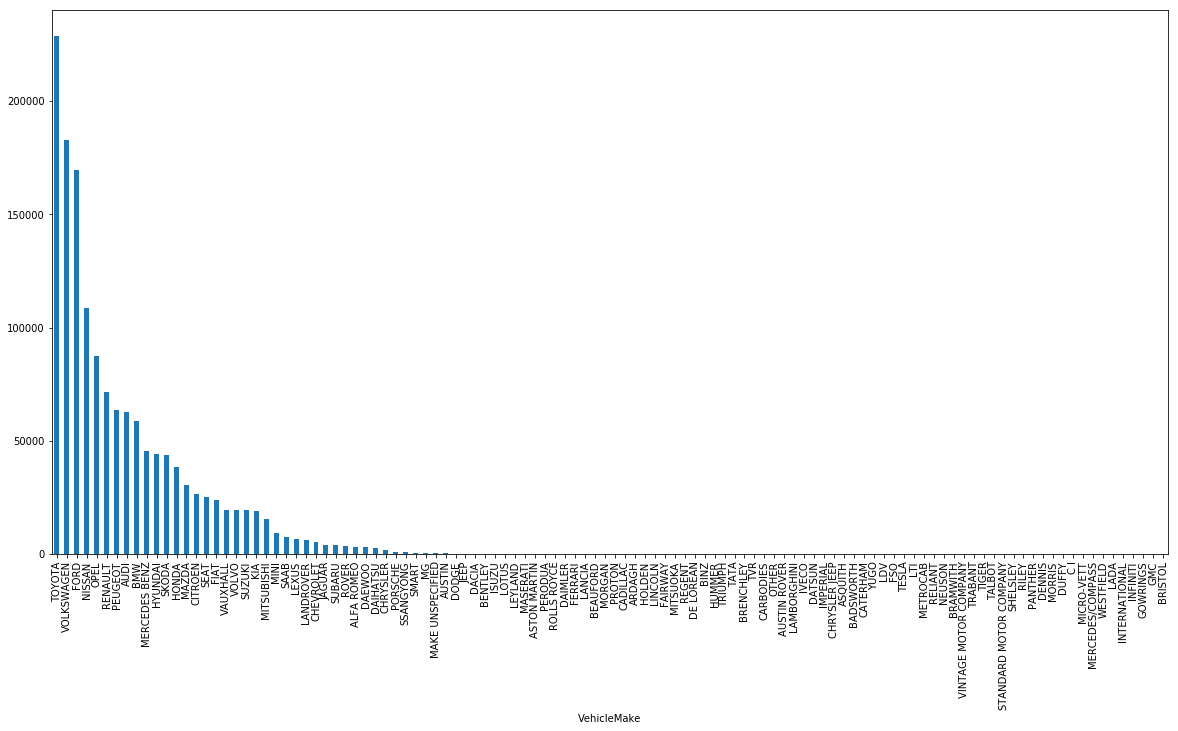

In [96]:
#df['VehicleMake'].value_counts().plot.bar()
df.groupby('VehicleMake')['Total'].sum().sort_values(ascending=False).plot.bar()

## Whats the most popular AUDI?

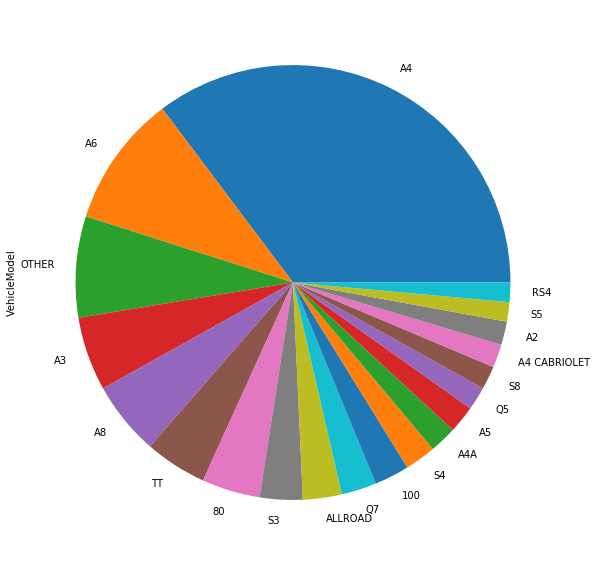

In [97]:
df[df['VehicleMake'] == 'AUDI']['VehicleModel'].value_counts()[0:20].plot.pie()

## What's the pass and fail rate by year of car?

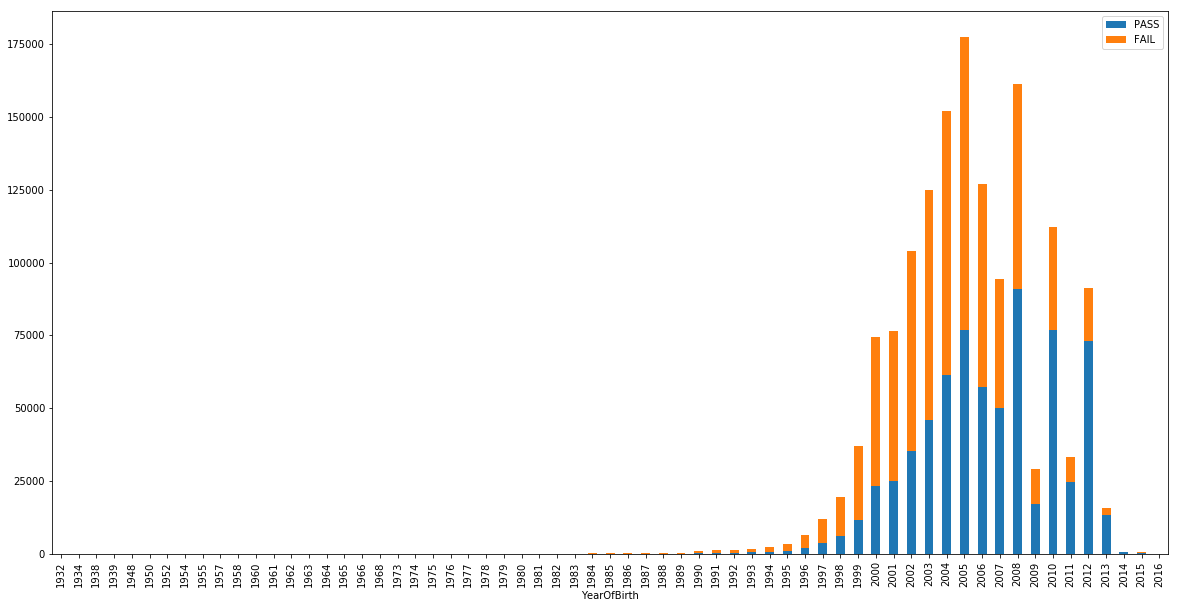

In [98]:
df.groupby('YearOfBirth')['PASS', 'FAIL'].sum().plot.bar(stacked=True)

## What's that wierd 1932 outlier?

In [99]:
df[df['YearOfBirth'] == 1932]

,VehicleMake,VehicleModel,YearOfBirth,Total,PASS,PASS %,FAIL,FAIL %,Vehicle and Safety Equipment,Vehicle and Safety Equipment %,Lighting and Electrical,Lighting and Electrical %,Steering and Suspension,Steering and Suspension %,Braking Equipment,Braking Equipment %,Wheels and Tyres,Wheels and Tyres %,"Engine, Noise and Exhaust","Engine, Noise and Exhaust %",Chassis and Body,Chassis and Body %,Side Slip Test,Side Slip Test %,Suspension Test,Suspension Test %,Light test,Light test %,Brake Test,Brake Test %,Emmissions,Emmissions %,OTHER,OTHER %,Incompletable,Incompletable %
5879,ROLLS ROYCE,OTHER,1932,1,0,0.0,1,100.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,100.0


## What are the best cars? (ok bad question! What cars pass most the at the first attempt?)


In [100]:
df5 = df.groupby('VehicleMake')['PASS','FAIL', 'Total'].sum()
df5.head()

,PASS,FAIL,Total
VehicleMake,,,
ALFA ROMEO,1298,1961,3259
ARDAGH,0,12,12
ASQUITH,1,1,2
ASTON MARTIN,36,22,58
AUDI,30555,32002,62557


In [101]:
df5['PassPercent'] = df5['PASS'] * 100 / df5['Total']
df5.head()

,PASS,FAIL,Total,PassPercent
VehicleMake,,,,
ALFA ROMEO,1298,1961,3259,39.828168
ARDAGH,0,12,12,0.000000
ASQUITH,1,1,2,50.000000
ASTON MARTIN,36,22,58,62.068966
AUDI,30555,32002,62557,48.843455


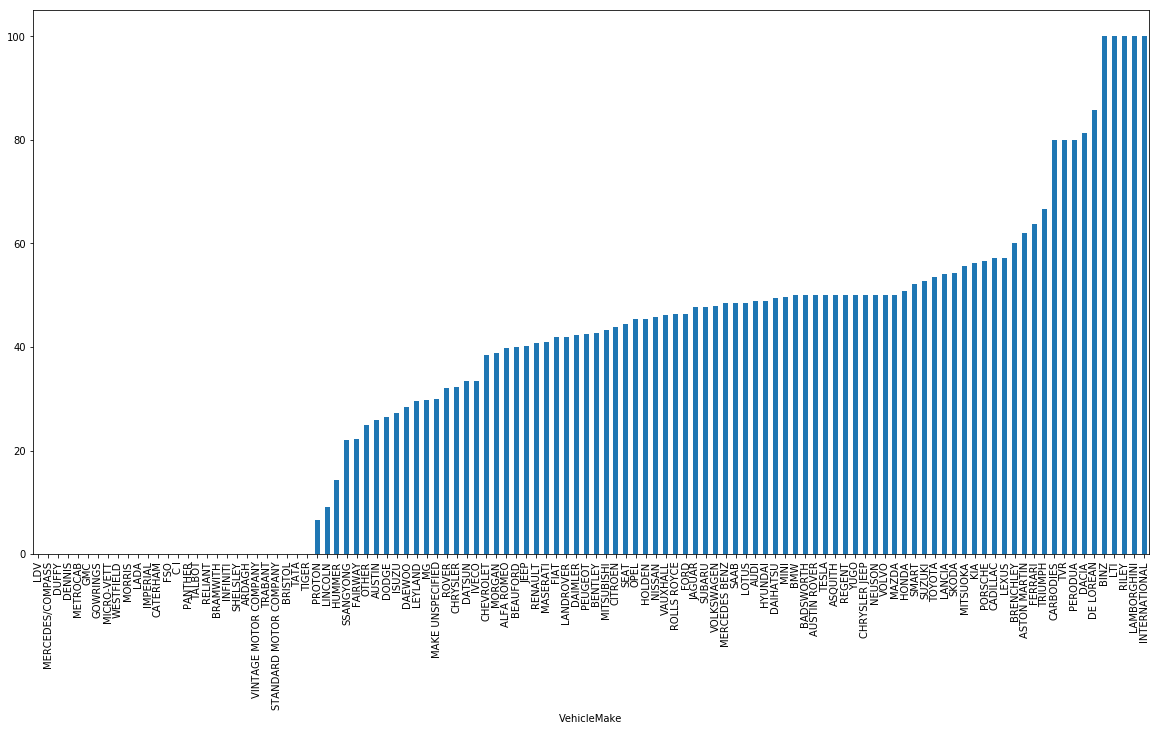

In [102]:
# Plot of all cars - lambourghinis pass most, I guess if you own one you keep it in good nick!
df5['PassPercent'].sort_values().plot.bar()

In [36]:
# We could take the count based on say more than 1000 cars tested...
df5['Total'] > 1000

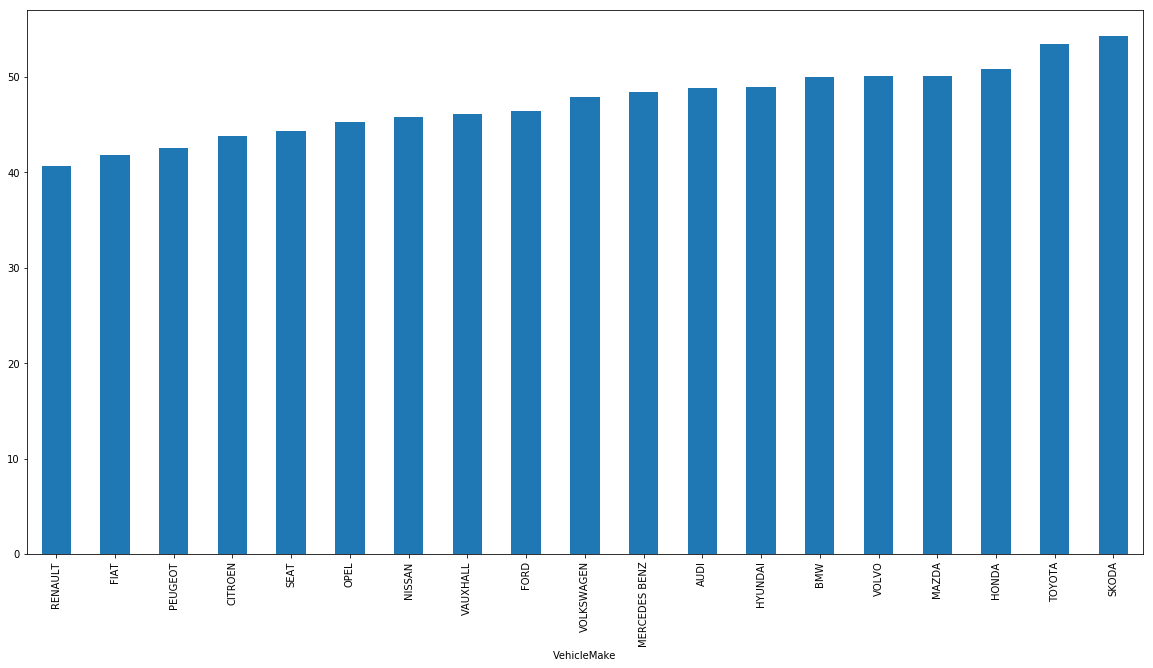

In [103]:
# Or just The top 20 car makes
df5 = df5.sort_values('Total', ascending=False)[0:19]
df5.head()
df5['PassPercent'].sort_values().plot.bar()

## Overlay the bar chart of pass/fails with the percentage fails per year

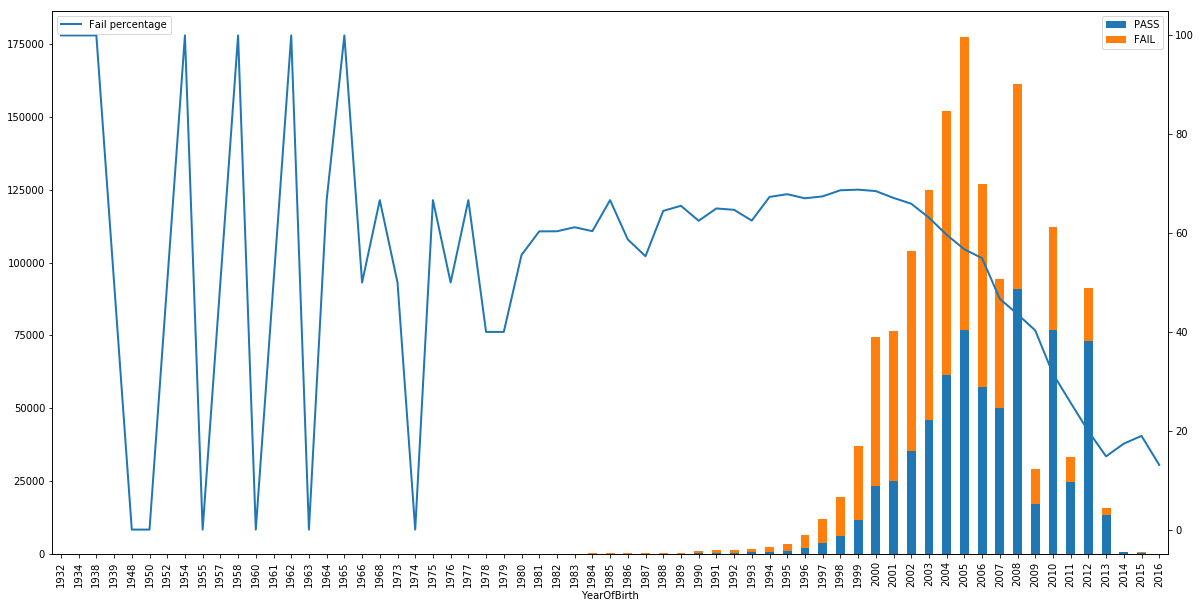

In [104]:
df6 = df.groupby('YearOfBirth')['PASS', 'FAIL'].sum()
df6['FailPercent'] = df6['FAIL'] * 100 / (df6['PASS'] + df6['FAIL'])

# A little matplotlib trickery
ax = df6.groupby('YearOfBirth')['PASS', 'FAIL'].sum().plot.bar(stacked=True)
ax2 = ax.twinx()
ax2.plot(df6['FailPercent'].values, linestyle='-', linewidth=2.0)


ax.legend(loc=1)
ax2.legend(["Fail percentage"], loc=2)

plt.show()


# Time Series Analysis

Briefly I want to look at time series analysis as it's a useful feature of pandas that it can do interesting things when we have timestamps/dates as the index.

Let's read in the Oracle stock prices for the past 5 years as taken from Yahoo Finance. looks pretty similar to the previous data. Index is just an integer. And date is a string.

In [45]:
df = pd.read_csv("ORCL.csv")
display(df.head())
df.dtypes

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-14,39.080002,39.750000,39.080002,39.570000,36.690567,16022000
1,2014-04-15,39.700001,39.980000,39.240002,39.730000,36.838921,14553400
2,2014-04-16,39.939999,40.150002,39.509998,40.130001,37.209820,13614800
3,2014-04-17,39.959999,40.180000,39.389999,40.080002,37.163456,14644100
4,2014-04-21,40.240002,40.439999,40.060001,40.240002,37.311825,8593600


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

We can use the parse_dates argument to tell pandas which columns to parse into dates.

There will be times where parse_dates fails to parse the string into a date. In these cases we can use the converters argument to read_csv to give a function that will parse the string into a datetime object.

In [4]:
df = pd.read_csv("ORCL.csv", parse_dates=["Date"], index_col=["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-14,39.080002,39.750000,39.080002,39.570000,36.690567,16022000
2014-04-15,39.700001,39.980000,39.240002,39.730000,36.838921,14553400
2014-04-16,39.939999,40.150002,39.509998,40.130001,37.209820,13614800
2014-04-17,39.959999,40.180000,39.389999,40.080002,37.163456,14644100
2014-04-21,40.240002,40.439999,40.060001,40.240002,37.311825,8593600


### A digression on read_csv()
read_csv() has some other useful options for selecting just the columns we want, selecting a different separator or using a regular expression to separate, and to apply functions to the data we're reading in.

For example here's how you might read in a custom apache log file and parse the date.

https://mmas.github.io/read-apache-access-log-pandas has more on this approach.

In [ ]:
# Example log entry
# 127.0.0.1 - - [01/Nov/2016:21:37:48 +0000] "GET /solaris/support/solaris/manifest/0/entire@0.5.11%2C5.11-0.175.3.8.0.7.0%3A20160520T164511Z HTTP/1.1" 200 10029 "-" "pkg/e90978f49a2c (sunos sun4v; 5.11 11.3; none; pkgrecv)" "-" "-" "user@example.com"

def parse_datetime(x):
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    return dt

def parse_str(x):
    return x[1:-1]

df = pd.read_csv(
        tmplog, 
        sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])', 
        engine='python', 
        na_values='-',
        header=None,
        usecols=[0, 3, 4, 5, 8, 9, 10, 11],
        names=['ip', 'time', 'request', 'status', 'referer', 'uuid', 'user_agent', 'email'],
        converters={'time': parse_datetime,
                'request': parse_str,
                'status': int,
                'size': int,
                'referer': parse_str,
                'uuid': parse_str,
                'user_agent': parse_str,
                'email': parse_str})


## Plot the closing prices for the data

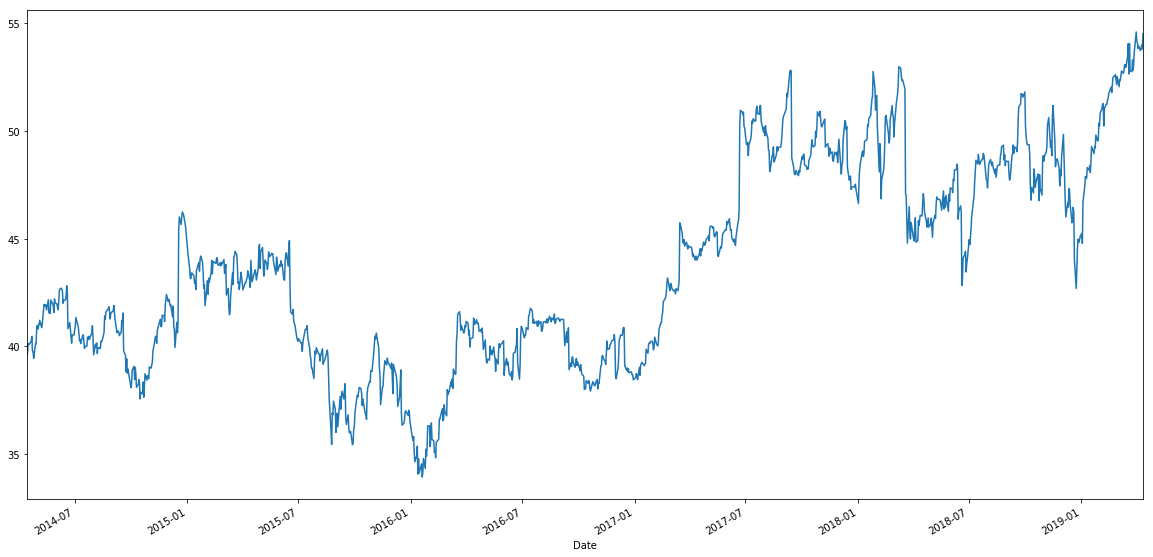

In [111]:
df.Close.plot()

## Selecting/Plotting date ranges

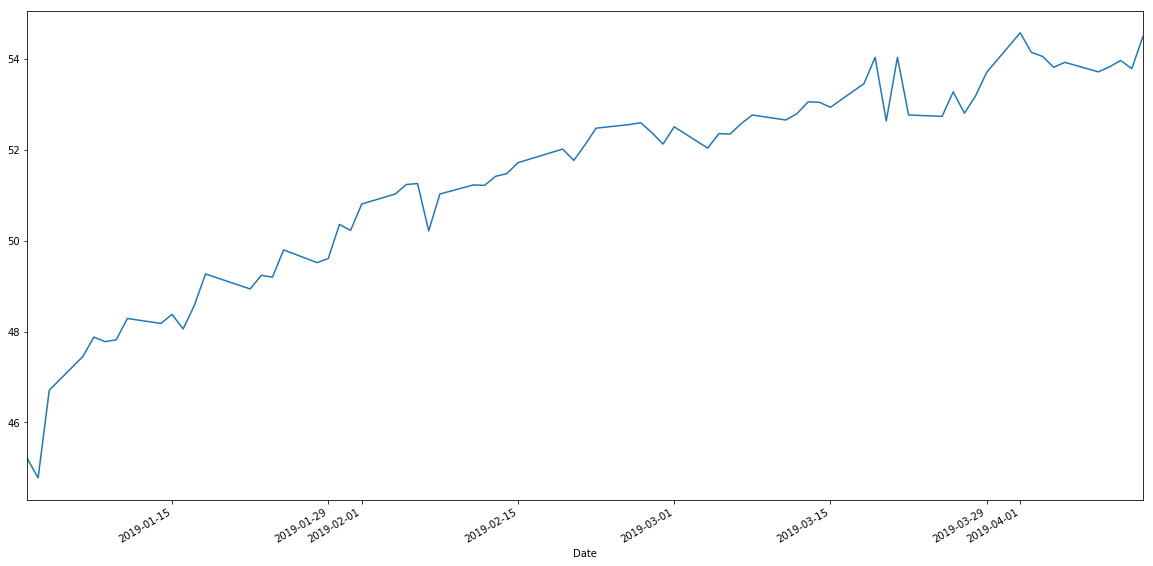

In [113]:
# Plot the closing prices for 2019
df["2019"].Close.plot()

# Plot the closing prices for Dec 2018
#df["2018-12"].Close.plot()

# Plot the closing prices for 2018
#df["2018":"2019"].Close.plot()

# Plot the closing prices for July 2018 - 2019
#df["2018-06":"2019"].Close.plot()



## Padding missing data.
Our dataset only has weekdays so we pad it out to include weekends and holidays

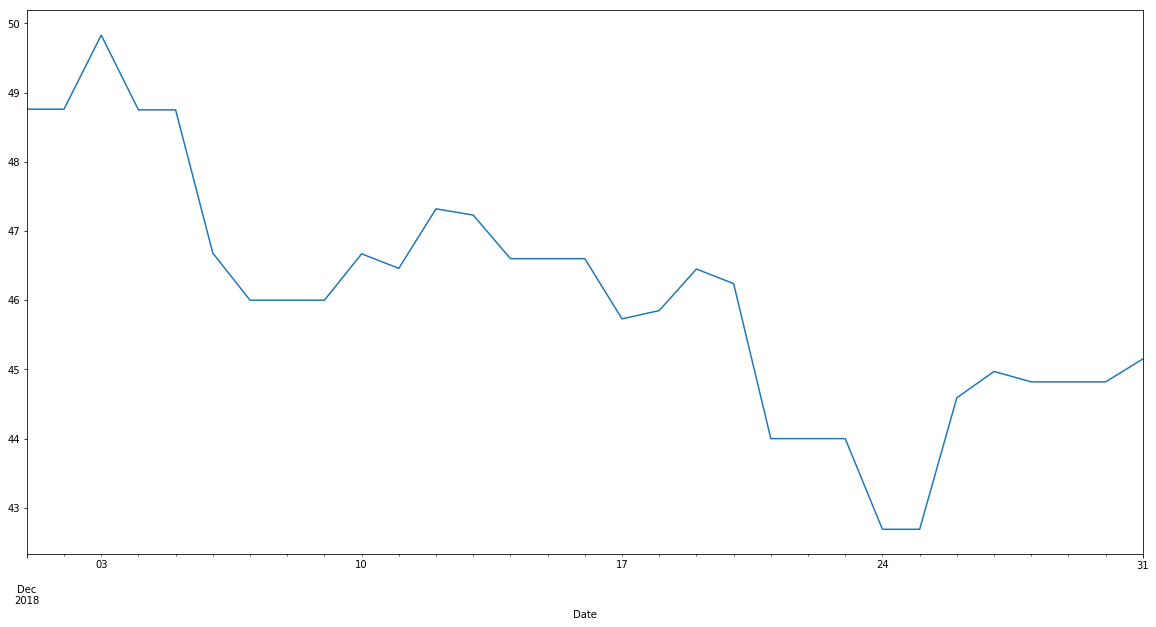

In [107]:
# Only on days the stock has traded - weekdays
#df.head()

# we can resample this to include weekends and non trading days
df = df.asfreq('D', method='pad', )
df["2018-12"].Close.plot()


## Show the closing stock price weekly or monthly or both?

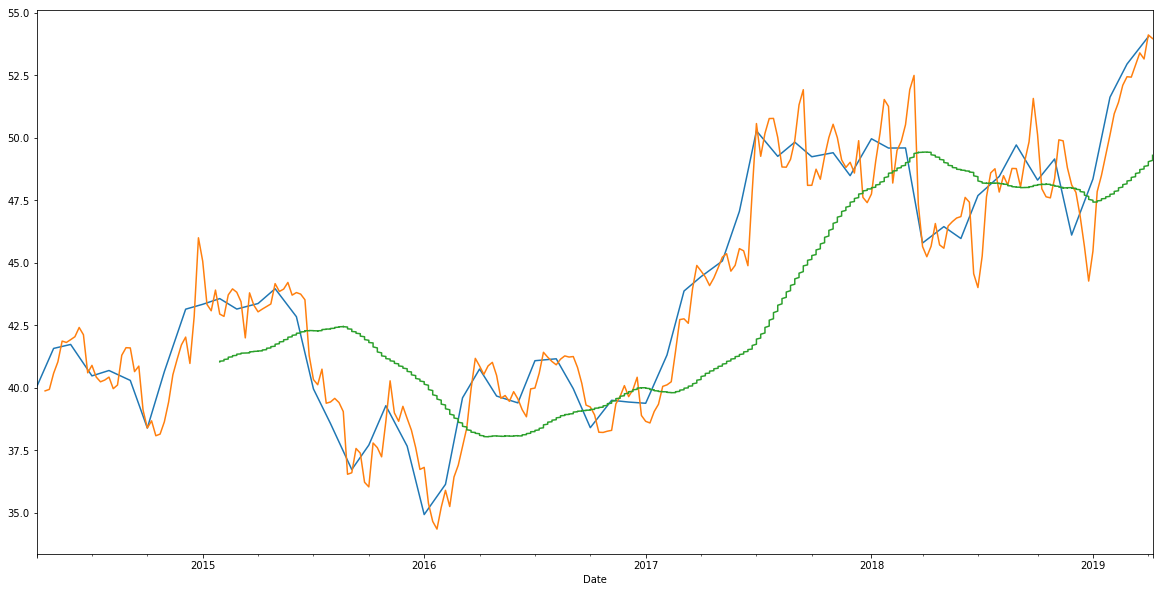

In [24]:
ax = df.resample('M').Close.mean().plot()
df.resample('W').Close.mean().plot(ax=ax)
df.Close.rolling(200).mean().plot(ax=ax)